# Exploratory Data Analysis Palmer Penguins
<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=500>

Done by: Carlos M Mazzaroli

Data comes from:

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv

## About the data

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://pallter.marine.rutgers.edu/).

## Atributes:

Numeric

1. **species:** the penguin species (Adelie, Chinstrap or Gento)

1. **island:**  isla en la Antártida donde se observó cada pingüino (Biscoe, Torgersen or Dream)

1. **bill_length_mm:** bill length measurement in millimeters

1. **bill_depth_mm:** bill depth measurement in millimeters

1. **flipper_length_mm:** flipper length measurement in millimeters

1. **body_mass_g:** penguin body weight measurement

1. **sex:**  (female or male)  

1. **year:** year of study

## Initial configuration





install libraries

In [1]:
!pip install --upgrade pip
!pip install numpy pandas matplotlib seaborn empiricaldist statsmodels sklearn pyjanitor

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import empiricaldist
import janitor

### Graphs appareance

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

# Seaborn
penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
    'Torgersen': '#955FC8', 
    'Biscoe': '#94e2c3', 
    'Dream': '#345469',
    'Female': 'pink',
    'Male': 'skyblue',
}

# Matplotlib
pcolors =['#ff6602ff','#0f7175ff','#c65dc9ff']
icolors =['#955FC8', '#94e2c3', '#345469']
scolors =['pink','skyblue',]

plt_colors=[pcolors,icolors,scolors]

## Data validation

### Load dataset

In [4]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Variables from the dataset

1. **species:** (Categorical)
1. **island:** (Categorical)
1. **bill_length_mm:** (Numerical)
1. **bill_depth_mm:** (Numerical)
1. **flipper_length_mm:** (Numerical)
1. **body_mass_g:** (Numerical)
1. **sex:** (Categorical)
1. **year:** (Numerical)

- **Numerical data**: 4
- **Categorical data**: 3

Shape of the dataset: 

- rows: 344
- cols: 7

In [6]:
male = df.sex == 'male'
female = ~male

adelie = df.species == 'Adelie'
chinstrap = df.species == 'Chinstrap'
gentoo = df.species == 'Gento'

torgersen = df.island == 'Torgersen'
dream = df.island == 'Dream'
biscoe = df.island == 'Biscoe'

species = [adelie,chinstrap,gentoo]
islands = [torgersen,dream,biscoe]
sex = [male, female]

category_columns = ['species','island','sex']
species_columns = ['Adelie', 'Chinstrap', 'Gentoo' ]

#### Data Cleaning

Not missing values

In [7]:
df.notnull().sum()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

Missing values

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Proportion of missing values

In [9]:
df.isnull().sum()/df.notnull().sum()

species              0.000000
island               0.000000
bill_length_mm       0.005848
bill_depth_mm        0.005848
flipper_length_mm    0.005848
body_mass_g          0.005848
sex                  0.033033
dtype: float64

Missing values

In [10]:
sex_null = df.isnull().any(True)
sex_null
df[sex_null]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


##### **Observation:**
 The missing values come mainly from the gender variable, except for two penguins that are missing all of their numeric and gender variables. A new data frame will be created with the null values removed to continue the study and then the null values will be retaken.

In [11]:
df2 = df.dropna()
print(f'''
{df2.isna().any()}
''')


species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool



#### Convert data type

In [12]:
df = df.astype({'species': 'category','island': 'category','sex': 'category',}) 
df2 = df2.astype({'species': 'category','island': 'category','sex': 'category',}) 


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


# Univariate Analysis

## Descriptive Statistics

### Basic descriptive statistics

Numeric statistics

In [27]:
display(df2.describe(include=np.number))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


See the median and mode

In [43]:
df2.median(numeric_only=True)


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

In [44]:
df2.mode(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,41.1,17.0,190.0,3800.0


Categorical statistics

In [15]:
df2.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


Proportions categorical values

In [18]:
a = pd.DataFrame((df2.sex.value_counts()/df2.sex.count())*100)
b = pd.DataFrame((df2.island.value_counts()/df2.island.count())*100)
c = pd.DataFrame((df2.species.value_counts()/df2.species.count())*100)

pd.concat([a,b,c]).replace({np.NaN},{'.'}).T

,Male,Female,Biscoe,Dream,Torgersen,Adelie,Gentoo,Chinstrap
sex,50.45045,49.54955,.,.,.,.,.,.
island,.,.,48.948949,36.936937,14.114114,.,.,.
species,.,.,.,.,.,43.843844,35.735736,20.42042


Categorical variables count visualization

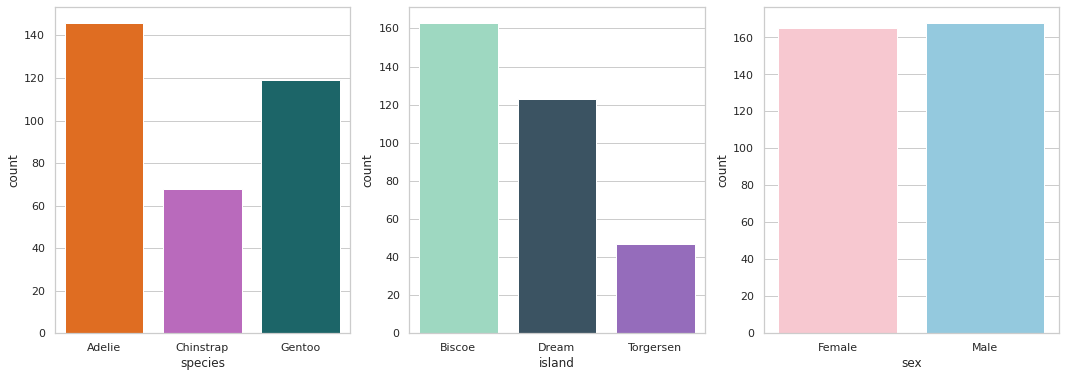

In [21]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i in range(3):
    sns.countplot(
        ax=ax[i], 
        data=df2,
        x=category_columns[i],
        palette=penguin_color
    )

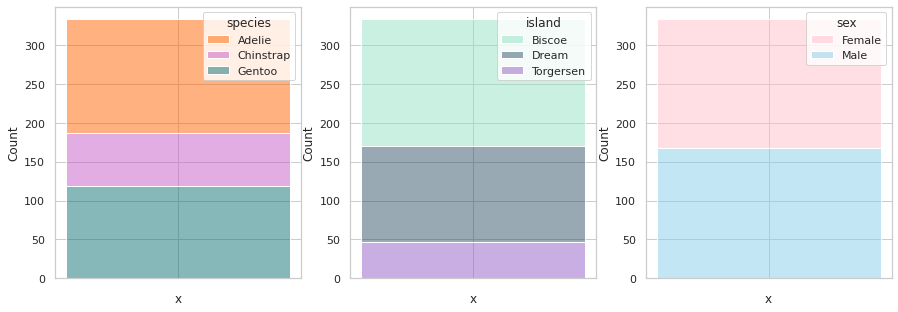

In [20]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

for i in range(len(category_columns)):
    sns.histplot(
        ax=ax[i],
        data=df2.add_column('x','').reset_index(),
        x='x',
        multiple='stack',
        hue=category_columns[i],
        palette=penguin_color,
        alpha=0.5
    )

De los graficos vemos que tenemos una cantidad parecida de Adelie y gentoos, pero pocos chisntrap, la mayoria de los pinguinos estan en la isla biscoe, en la dream es la segunda mas poblada y torgersen es la que menos densidad tiene, el sexo de pinguinos esta balanceado

Partial Conclusions

From the previous calculus several things can be concluded:

- It is almost equally distributed pandemic and pre-pandemic cases
- The 50% of the patients were over 72 years and the rest under 72 years.
- The 50% of the tumor had a size at least 48 mm

### Central Tendency Measures